## Computing dispersion


In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

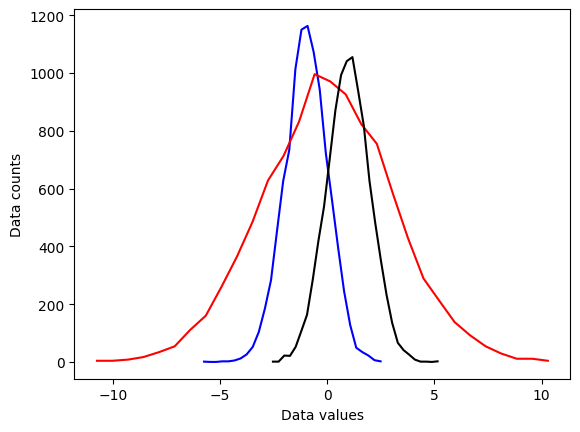

In [2]:
## create some data distributions

# the distributions
N = 10001   # number of data points
nbins = 30  # number of histogram bins

d1 = np.random.randn(N) - 1
d2 = 3*np.random.randn(N)
d3 = np.random.randn(N) + 1

# need their histograms
y1,x1 = np.histogram(d1,nbins)
x1 = (x1[1:]+x1[:-1])/2

y2,x2 = np.histogram(d2,nbins)
x2 = (x2[1:]+x2[:-1])/2

y3,x3 = np.histogram(d3,nbins)
x3 = (x3[1:]+x3[:-1])/2


# plot them
plt.plot(x1,y1,'b')
plt.plot(x2,y2,'r')
plt.plot(x3,y3,'k')

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

In [3]:
# side note:

meanval = 10.2
stdval  = 7.5
numsamp = 123

# this
np.random.normal(meanval,stdval,numsamp)

# is equivalent to
np.random.randn(numsamp)*stdval + meanval

array([-0.95006849, 11.69883818,  6.87118736, 13.28884694, 20.17766852,
       22.00549317, 10.68918197,  9.9326281 , 18.11740626,  6.74691402,
        2.32873361, -2.9040425 ,  6.37691839,  2.74063293, -6.68035941,
       -1.54894604, 18.28869941, 11.93226445, 15.92802581, 20.26287335,
        6.95766058,  8.50115675,  2.23867563, 34.58663088, 10.23713147,
       15.61768889,  7.41428288,  1.98585387, -3.88843756,  5.60893472,
       10.86397688,  6.97797422,  9.35402532,  8.94721522, 14.60371569,
       -2.06185896, 17.11400937,  5.81587096, 24.46676512,  8.59677404,
        6.90345354,  6.91994106, 12.15509178,  6.91088903,  7.52982477,
       -4.59024803, 19.99160022,  6.00012661, 12.2024513 ,  2.50249502,
       14.26802829, 15.39666039, -2.6609798 , 15.34777832, -6.85436117,
        6.93043919,  5.96590933, 11.77189576, 17.36641212,  4.39417553,
        0.10391418, 17.35428099,  4.78563816,  7.73323823, 12.53614815,
        3.51501863, -2.94630179, -1.50730566, 10.17143637,  1.56

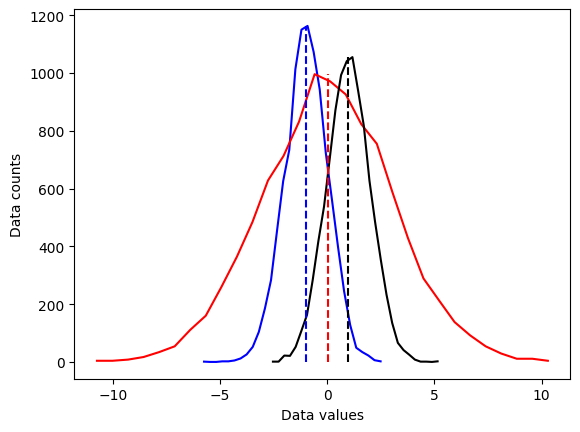

In [4]:
## overlay the mean

# compute the means
mean_d1 = sum(d1) / len(d1)
mean_d2 = np.mean(d2)
mean_d3 = np.mean(d3)

# plot them
plt.plot(x1,y1,'b', x2,y2,'r', x3,y3,'k')
plt.plot([mean_d1,mean_d1],[0,max(y1)],'b--')
plt.plot([mean_d2,mean_d2],[0,max(y2)],'r--')
plt.plot([mean_d3,mean_d3],[0,max(y3)],'k--')

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

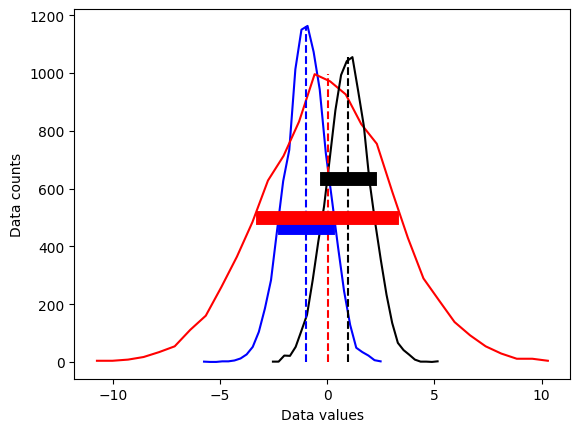

In [5]:
## now for the standard deviation

# initialize
stds = np.zeros(3)

# compute standard deviations
stds[0] = np.std(d1,ddof=1)
stds[1] = np.std(d2,ddof=1)
stds[2] = np.std(d3,ddof=1)


# same plot as earlier
plt.plot(x1,y1,'b', x2,y2,'r', x3,y3,'k')
plt.plot([mean_d1,mean_d1],[0,max(y1)],'b--', [mean_d2,mean_d2],[0,max(y2)],'r--',[mean_d3,mean_d3],[0,max(y3)],'k--')

# now add stds
plt.plot([mean_d1-stds[0],mean_d1+stds[0]],[.4*max(y1),.4*max(y1)],'b',linewidth=10)
plt.plot([mean_d2-stds[1],mean_d2+stds[1]],[.5*max(y2),.5*max(y2)],'r',linewidth=10)
plt.plot([mean_d3-stds[2],mean_d3+stds[2]],[.6*max(y3),.6*max(y3)],'k',linewidth=10)

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

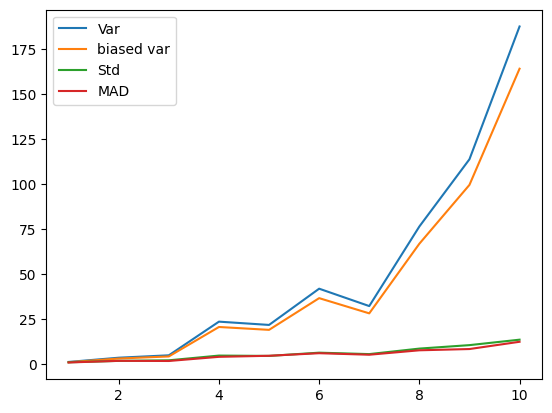

In [9]:
## different variance measures

variances = np.arange(1,11)
N = 8

varmeasures = np.zeros((4,len(variances)))

for i in range(len(variances)):
    
    # create data and mean-center
    data = np.random.randn(N) * variances[i]
    datacent = data - np.mean(data)
    
    # variance
    varmeasures[0,i] = sum(datacent**2) / (N-1)
    
    # "biased" variance
    varmeasures[1,i] = sum(datacent**2) / N
    
    # standard deviation
    varmeasures[2,i] = np.sqrt( sum(datacent**2) / (N-1) )
    
    # MAD (mean absolute difference)
    varmeasures[3,i] = sum(abs(datacent)) / (N-1)
    

# show them!
plt.plot(variances,varmeasures.T)
plt.legend(('Var','biased var','Std','MAD'))
plt.show()

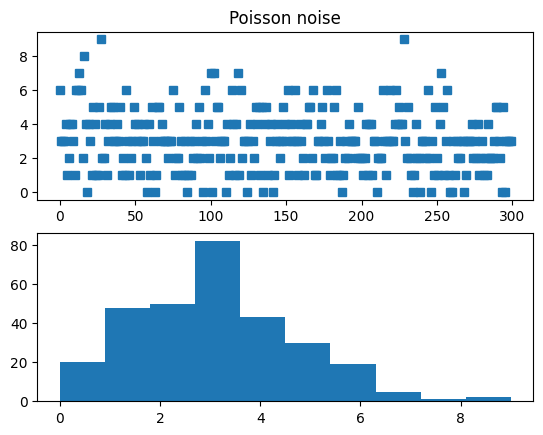

In [7]:
## Fano factor and coefficient of variation (CV)

# need positive-valued data (why?)
data = np.random.poisson(3,300)  # "Poisson noise"

fig,ax = plt.subplots(2,1)
ax[0].plot(data,'s')
ax[0].set_title('Poisson noise')

ax[1].hist(data)
plt.show()

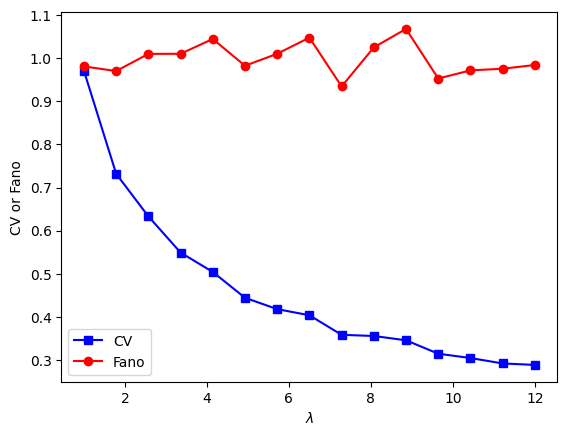

In [8]:
## compute fano factor and CV for a range of lambda parameters

# list of parameters
lambdas = np.linspace(1,12,15)

# initialize output vectors
fano = np.zeros(len(lambdas))
cv   = np.zeros(len(lambdas))

for li in range(len(lambdas)):
    
    # generate new data
    data = np.random.poisson(lambdas[li],1000)
    
    # compute the metrics
    cv[li]   = np.std(data) / np.mean(data) # need ddof=1 here?
    fano[li] = np.var(data) / np.mean(data)


# and plot
plt.plot(lambdas,cv,'bs-')
plt.plot(lambdas,fano,'ro-')
plt.legend(('CV','Fano'))
plt.xlabel('$\lambda$')
plt.ylabel('CV or Fano')
plt.show()